In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

In [2]:
df = pd.read_csv("Heart_Disease_Dataset.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# (آ)
موارد خواسته شده به ترتیب در زیر آمده است.

In [4]:
# i
shape = df.shape
shape

(1190, 12)

In [5]:
# ii
t = 0
for i in range(df.shape[0]):
  if df.iloc[i].isnull().values.any():
    t = t + 1
print('Number of deleted features:', t)

Number of deleted features: 0


In [7]:
# iii
number_of_all_classes = np.abs(df['target'].count())
print(number_of_all_classes)
number_of_one_classes = np.abs(df['target'].sum())
print(number_of_one_classes)
number_of_zero_classes = number_of_all_classes - number_of_one_classes
print(number_of_zero_classes)
# it seems that classes are balanced approximately
print('difference between number of classes:', number_of_one_classes - number_of_zero_classes)

1190
629
561
difference between number of classes: 68


Text(0.5, 1.0, 'age distribution of class 1')

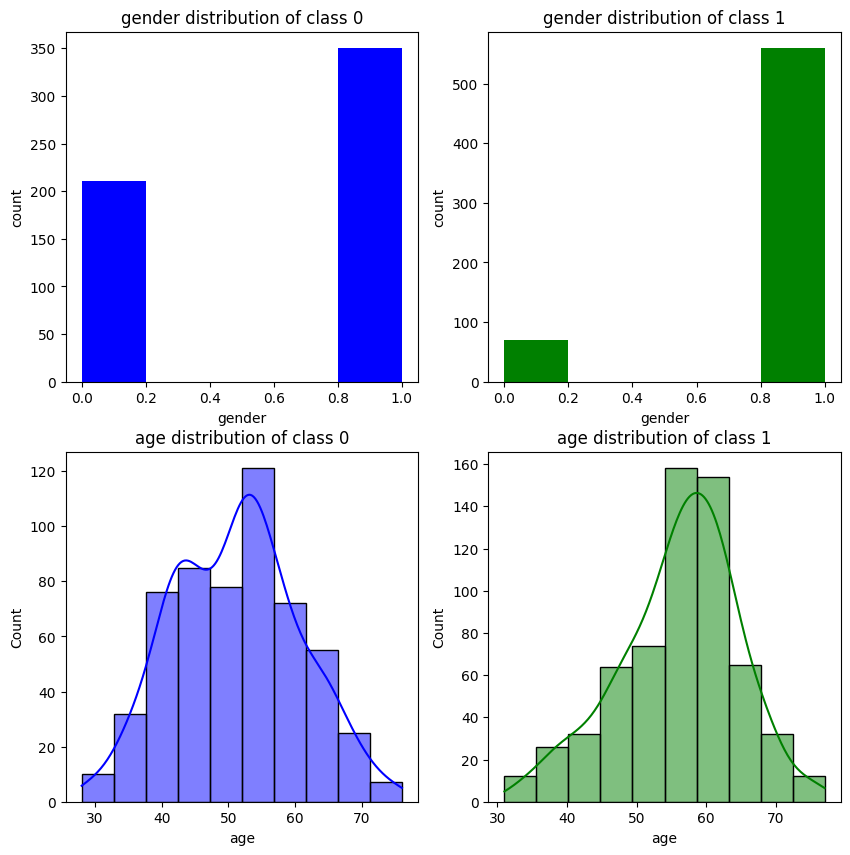

In [8]:
# iv
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(df[df.target == 0]['sex'], bins = 5, color='blue')
plt.title('gender distribution of class 0')
plt.xlabel('gender')
plt.ylabel('count')
plt.subplot(222)
plt.hist(df[df.target == 1]['sex'], bins = 5, color='green')
plt.title('gender distribution of class 1')
plt.xlabel('gender')
plt.ylabel('count')
plt.subplot(223)
sns.histplot(df[df.target == 0]['age'], bins = 10, kde=True, color='blue')
plt.title('age distribution of class 0')
plt.subplot(224)
sns.histplot(df[df.target == 1]['age'], bins = 10, kde=True, color='green')
plt.title('age distribution of class 1')

(ب)
برای هر ویژگی پیوسته این رابطه را حساب میکنیم و داده های اضافی را دور می اندازیم.
|z - mu|/ sigma <= 3


In [9]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [10]:
df1 = df[np.abs(df['age']-df['age'].mean()) >= (3*df['age'].std())]
df = df[np.abs(df['age']-df['age'].mean()) <= (3*df['age'].std())]
df1

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


In [11]:
df2 = df[np.abs(df['resting bp s']-df['resting bp s'].mean()) >= (3*df['resting bp s'].std())]
df = df[np.abs(df['resting bp s']-df['resting bp s'].mean()) <= (3*df['resting bp s'].std())]
df2

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
109,39,1,2,190,241,0,0,106,0,0.0,1,0
242,54,1,4,200,198,0,0,142,1,2.0,2,1
366,64,0,4,200,0,0,0,140,1,1.0,2,1
400,61,1,3,200,0,1,1,70,0,0.0,2,1
450,55,1,3,0,0,0,0,155,0,1.5,2,1
593,61,1,4,190,287,1,2,150,1,2.0,3,1
734,56,0,4,200,288,1,2,133,1,4.0,3,1
761,54,1,2,192,283,0,2,195,0,0.0,1,1
1013,56,0,4,200,288,1,2,133,1,4.0,3,1
1075,54,1,2,192,283,0,2,195,0,0.0,1,1


In [12]:
df3 = df[np.abs(df['cholesterol']-df['cholesterol'].mean()) >= (3*df['cholesterol'].std())]
df = df[np.abs(df['cholesterol']-df['cholesterol'].mean()) <= (3*df['cholesterol'].std())]
df3

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
30,53,1,3,145,518,0,0,130,0,0.0,2,1
76,32,1,4,118,529,0,0,130,0,0.0,2,1
149,54,1,4,130,603,1,0,125,1,1.0,2,1
618,67,0,3,115,564,0,2,160,0,1.6,2,0
1039,67,0,3,115,564,0,2,160,0,1.6,2,0


In [13]:
df4 = df[np.abs(df['max heart rate']-df['max heart rate'].mean()) >= (3*df['max heart rate'].std())]
df = df[np.abs(df['max heart rate']-df['max heart rate'].mean()) <= (3*df['max heart rate'].std())]
df4

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
371,60,1,4,135,0,0,0,63,1,0.5,1,1
391,51,1,4,140,0,0,0,60,0,0.0,2,1


In [14]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


(ج)
حال داده های غیر نرمال که 5 ستون را تشکیل میدهند نرمال میکنیم.

In [16]:
numeric_variables = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df[numeric_variables] = (df[numeric_variables] - df[numeric_variables].min())/(df[numeric_variables].max() - df[numeric_variables].min())
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.295455,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.409091,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.295455,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.465909,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.295455,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1,1,0.285714,0.537678,0,0,0.481481,0,0.431818,2,1
1186,0.816327,1,4,0.609524,0.393075,1,0,0.548148,0,0.681818,2,1
1187,0.591837,1,4,0.476190,0.266802,0,0,0.355556,1,0.431818,2,1
1188,0.591837,0,2,0.476190,0.480652,0,2,0.792593,0,0.295455,2,1


د)
حال داده ها را به صورت رندوم به داده های تست و آموزش تقسیم میکنیم و یادگیری را با سه کرنل در الگوریتم انجام میدهیم

In [17]:
import numpy as np
df['target'].replace(0 , -1 , inplace = True)
np.random.seed(42)

indices = np.random.permutation(df.shape[0])
split_point = int(0.7 * df.shape[0])

train_data = df.iloc[indices[:split_point]]
test_data = df.iloc[indices[split_point:]]
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
X_train_data = train_data[: , :-1]
y_train_data = train_data[: , -1]
X_test_data = test_data[: , :-1]
y_test_data = test_data[: , -1]

print("Train: ", X_train_data.shape ,y_train_data.shape)
print("Test: " ,X_test_data.shape ,y_test_data.shape)

Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


کرنل linear

In [18]:
# i
svm_linear = SVC(kernel='linear', random_state=42, C=100)
svm_linear.fit(X_train_data, y_train_data)
y_pred_linear = svm_linear.predict(X_test_data)
Accuracy_linear = np.sum((y_test_data == y_pred_linear)) / len(y_pred_linear)
Precision_linear = np.sum(((y_test_data == y_pred_linear) & (y_test_data == 1))) / np.sum((y_pred_linear == 1))
Recall_linear = np.sum(((y_test_data == y_pred_linear) & (y_test_data == 1))) / np.sum((y_test_data == 1))
F1score_linear = 2 * np.sum(((y_test_data == y_pred_linear) & (y_test_data == 1))) / (np.sum(y_test_data == 1) + np.sum(y_pred_linear == 1))
print('Accuracy_linear:', Accuracy_linear)
print('Precision_linear:', Precision_linear)
print('Recall_linear:', Recall_linear)
print('F1score_linear:', F1score_linear)

Accuracy_linear: 0.8409090909090909
Precision_linear: 0.8315217391304348
Recall_linear: 0.8595505617977528
F1score_linear: 0.8453038674033149


کرنل RBF

In [19]:
# ii
svm_RBF = SVC(kernel='rbf', gamma=5, random_state=42, C=100)
svm_RBF.fit(X_train_data, y_train_data)
y_pred_RBF = svm_RBF.predict(X_test_data)
Accuracy_RBF = np.sum((y_test_data == y_pred_RBF)) / len(y_pred_RBF)
Precision_RBF = np.sum(((y_test_data == y_pred_RBF) & (y_test_data == 1))) / np.sum((y_pred_RBF == 1))
Recall_RBF = np.sum(((y_test_data == y_pred_RBF) & (y_test_data == 1))) / np.sum((y_test_data == 1))
F1score_RBF = 2 * np.sum(((y_test_data == y_pred_RBF) & (y_test_data == 1))) / (np.sum(y_test_data == 1) + np.sum(y_pred_RBF == 1))
print('Accuracy_RBF:', Accuracy_RBF)
print('Precision_RBF:', Precision_RBF)
print('Recall_RBF:', Recall_RBF)
print('F1score_RBF:', F1score_RBF)

Accuracy_RBF: 0.8693181818181818
Precision_RBF: 0.8793103448275862
Recall_RBF: 0.8595505617977528
F1score_RBF: 0.8693181818181818


Poⅼynominaⅼ کرنل

In [21]:
# iii
svm_Poly = SVC(kernel='poly', random_state=42, C=100)
svm_Poly.fit(X_train_data, y_train_data)
y_pred_Poly = svm_Poly.predict(X_test_data)
Accuracy_Poly = np.sum((y_test_data == y_pred_Poly)) / len(y_pred_Poly)
Precision_Poly = np.sum(((y_test_data == y_pred_Poly) & (y_test_data == 1))) / np.sum((y_pred_Poly == 1))
Recall_Poly = np.sum(((y_test_data == y_pred_Poly) & (y_test_data == 1))) / np.sum((y_test_data == 1))
F1score_Poly = 2 * np.sum(((y_test_data == y_pred_Poly) & (y_test_data == 1))) / (np.sum(y_test_data == 1) + np.sum(y_pred_Poly == 1))
print('Accuracy_Poly:', Accuracy_Poly)
print('Precision_Poly:', Precision_Poly)
print('Recall_Poly:', Recall_Poly)
print('F1score_Poly:', F1score_Poly)

Accuracy_Poly: 0.8494318181818182
Precision_Poly: 0.8342245989304813
Recall_Poly: 0.8764044943820225
F1score_Poly: 0.8547945205479452
